The new octave version was recently released and I was excited to test the new `classdef`, to use my Matlab [FVTool](https://github.com/simulkade/FVTool) with the same functionality in the free (as in free speech and free coffee) Octave. In the process of rewriting the code, I use the design of [JFVM.jl](https://github.com/simulkade/JFVM.jl). The good news is that now the syntax for JFVM and FVTool are almost identical, except the differences between the languages. The other good news is that now the package supports nonuniform grids. I have already used that feature in a paper (well, an appendix of a paper). The bad news is that the new API is not compatible with the previous version of FVTool. I have updated all the examples to the new API. If you like the older version, please use [this link](https://github.com/simulkade/FVTool/archive/v0.11.zip) to download it. The main change in the new version is that now `CellVariable` and `FaceVariable` are new objects, with a `MeshStructure` field, and a `value`, or `xvalue`, `yvalue`, and `zvalue` fields. and therefore you don't need to send `MeshStructure` as an argument to the discretization and Calculus functions.  
One other small change is that I had to disable a function call in the visualization routines, viz. `alpha`. If you are in Matlab and you like to make your visualization fancier by adding a bit of transparency, consider enabling this function in the visualization routines. The visualization is very basik anyway. I will think about a better way to export the results to other visualization packages for the future versions.  
Let's see the code in action:

In [2]:
addpath('/home/ali/MyPackages/FVTool')
FVToolStartUp()

AGMG 3.x linear solver is NOT available.
FiniteVolumeToolbox has started successfully.


In [5]:
% create a nonuniform mesh
x=[0,0.1, 0.2, 0.25, 0.4, 0.42, 0.43, 0.6, 0.75, 0.9, 0.91, 0.92, 0.95, 1.0];
m=createMesh1D(x);
m3=createMesh3D(x,x,x);
m

m =

<object MeshStructure>



As you can see, `m` is not of type `struct` anymore. I have used `classdef` to define its own object type, in this case `MeshStructure`.

In [10]:
D=createCellVariable(m, 1.0);
D_face=arithmeticMean(D); # no need to send the mesh variable to the function
disp(D)

<object CellVariable>


You can see that `D` is now a `CellVariable` object, and the mesh over which it is defined is stored in:

In [11]:
D.domain

ans =

<object MeshStructure>



Let's continue and solve a diffusion equation over the 3D domain:

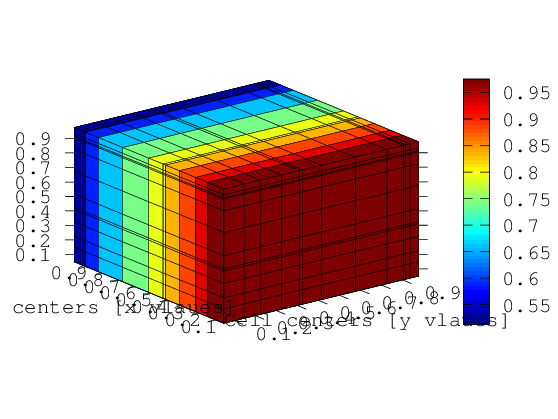

In [13]:
D=createCellVariable(m3, 1.0);
D_face=arithmeticMean(D);
BC=createBC(m3);
BC.left.a(:)=0; BC.left.b(:)=1.0; BC.left.c(:)=1.0;
BC.right.a(:)=0.0; BC.right.b(:)=1.0; BC.right.c(:)=0.5;
[Mbc, RHSbc]=boundaryCondition(BC);
Md=diffusionTerm(D_face);
c=solvePDE(m3, Md+Mbc, RHSbc);
visualizeCells(c)

I'll come back with more interesting cases in the [FVT blog](http://fvt.simulkade.com). 